In [1]:
import pandas as pd

df = pd.read_csv('power_generation.csv')
df.head()

,year,pumped storage net power generation(TPC),pumped storage load auxiliaries(TPC),heat power net power generation(TPC),heat power load auxiliaries(TPC),heat power net power generation(IPP),heat power net power generation(self),nuclear power net power generation(TPC),nuclear power load auxiliaries(TPC),renewable energy,...,renewable energy solar power(self),renewable energy wind power(self),renewable energy biomass(self),renewable energy Waste-to-energy(self),total power generation,total power generation(TPC),total net power generation(TPC),total load auxiliaries(TPC),total power generation(IPP),total power generation(self)
0,94,3830.254000,8.26425,94828.53629,4722.994654,37520.59588,39088.66034,38403.88780,1568.12020,7540.953655,...,0.960000,14.305665,323.479207,3053.840426,227512.2671,147466.5950,141150.4771,6316.117928,37564.42640,42481.24563
1,95,3902.278001,8.38872,103094.70090,5094.444369,36875.63699,38940.33964,38316.60622,1553.89158,7743.855829,...,1.457000,11.731636,321.295341,3056.677989,235530.1423,156172.6496,149495.2453,6677.404275,37025.99107,42331.50160
2,96,3924.461000,8.24026,106912.01940,5170.269862,37395.02604,40842.61070,38960.77298,1578.38702,8324.820677,...,2.180000,10.169579,302.267532,3163.288733,243116.6079,161152.6489,154376.6775,6775.971402,37643.44250,44320.51655
3,97,3458.878000,8.28650,108140.78450,5176.339498,36480.25678,35954.91204,39260.45902,1566.40058,8259.072411,...,4.376857,9.179507,272.488782,3088.740144,238305.3893,162044.7045,155271.9872,6772.717294,36930.98750,39329.69733
4,98,3289.716523,15.38786,96761.75147,4518.353189,39618.93004,36452.37884,39981.03390,1590.09490,7809.531307,...,9.014407,8.277022,229.350506,3036.144627,230037.1780,150129.5847,143986.1861,6143.398562,40172.42793,39735.16540


In [2]:
df.columns

Index(['year', 'pumped storage net power generation(TPC)',
       'pumped storage load auxiliaries(TPC)',
       'heat power net power generation(TPC)',
       'heat power load auxiliaries(TPC)',
       'heat power net power generation(IPP)',
       'heat power net power generation(self)',
       'nuclear power net power generation(TPC)',
       'nuclear power load auxiliaries(TPC)', 'renewable energy',
       'renewable energy hydroelectric power net power generation(TPC)',
       'renewable energy hydroelectric power load auxiliaries(TPC)',
       'renewable energy geothermal power(TPC)',
       'renewable energy solar power(TPC)', 'renewable energy wind power(TPC)',
       'renewable energy hydroelectric power(IPP)',
       'renewable energy solar power(IPP)', 'renewable energy wind power(IPP)',
       'renewable energy hydroelectric power(self)',
       'renewable energy geothermal power(self)',
       'renewable energy solar power(self)',
       'renewable energy wind power(self)'

In [3]:
df[['total power generation(TPC)', 'total net power generation(TPC)']].head()

,total power generation(TPC),total net power generation(TPC)
0,147466.5950,141150.4771
1,156172.6496,149495.2453
2,161152.6489,154376.6775
3,162044.7045,155271.9872
4,150129.5847,143986.1861


In [4]:
new_df = df[[
       'year', 
       'pumped storage net power generation(TPC)',
       'heat power net power generation(TPC)',
       'heat power net power generation(IPP)',
       'heat power net power generation(self)',
       'nuclear power net power generation(TPC)', 
       'renewable energy',
       'renewable energy hydroelectric power net power generation(TPC)',
       'renewable energy geothermal power(TPC)',
       'renewable energy solar power(TPC)', 
       'renewable energy wind power(TPC)',
       'renewable energy hydroelectric power(IPP)',
       'renewable energy solar power(IPP)', 
       'renewable energy wind power(IPP)',
       'renewable energy hydroelectric power(self)',
       'renewable energy geothermal power(self)',
       'renewable energy solar power(self)',
       'renewable energy wind power(self)',
       'renewable energy biomass(self)',
       'renewable energy Waste-to-energy(self)', 
       'total power generation',
       'total power generation(TPC)', 
       'total net power generation(TPC)',
       'total power generation(IPP)',
       'total power generation(self)']].copy()

tpc_df = df[[
    'year',
    'pumped storage net power generation(TPC)',
    'heat power net power generation(TPC)',
    'nuclear power net power generation(TPC)',
    'renewable energy hydroelectric power net power generation(TPC)',
    'renewable energy geothermal power(TPC)',
    'renewable energy solar power(TPC)', 
    'renewable energy wind power(TPC)',
    'total power generation(TPC)'
]].copy()

tpc_df['pumped storage rate'] = tpc_df.apply(lambda row: row['pumped storage net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['heat power rate'] = tpc_df.apply(lambda row: row['heat power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['nuclear power rate'] = tpc_df.apply(lambda row: row['nuclear power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['hydroelectric power rate(renewable energy)'] = tpc_df.apply(lambda row: row['renewable energy hydroelectric power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['geothermal power rate(renewable energy)'] = tpc_df.apply(lambda row: row['renewable energy geothermal power(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['solar power rate(renewable energy)'] = tpc_df.apply(lambda row: row['renewable energy solar power(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['wind power rate(renewable energy)'] = tpc_df.apply(lambda row: row['renewable energy wind power(TPC)'] / row['total power generation(TPC)'], axis=1)

def get_renewable_energy_sum(row):
    sum = 0
    sum += row['renewable energy hydroelectric power net power generation(TPC)']
    sum += row['renewable energy geothermal power(TPC)']
    sum += row['renewable energy solar power(TPC)']
    sum += row['renewable energy wind power(TPC)']
    return sum

def get_non_renewable_energy_sum(row):
    sum = 0
    sum += row['pumped storage net power generation(TPC)']
    sum += row['heat power net power generation(TPC)']
    sum += row['nuclear power net power generation(TPC)']
    return sum

tpc_df['renewable energy power generation(TPC)'] = tpc_df.apply(get_renewable_energy_sum, axis = 1)
tpc_df['non-renewable energy power generation(TPC)'] = tpc_df.apply(get_non_renewable_energy_sum, axis = 1)
tpc_df['renewable energy rate'] = tpc_df.apply(lambda row: row['renewable energy power generation(TPC)'] / row['total power generation(TPC)'], axis = 1)
tpc_df['non-renewable energy rate'] = tpc_df.apply(lambda row: row['non-renewable energy power generation(TPC)'] / row['total power generation(TPC)'], axis = 1)

tpc_df['hydroelectric power rate(in renewable)'] = tpc_df.apply(lambda row: row['renewable energy hydroelectric power net power generation(TPC)'] / row['renewable energy power generation(TPC)'], axis=1)
tpc_df['geothermal power rate(in renewable)'] = tpc_df.apply(lambda row: row['renewable energy geothermal power(TPC)'] / row['renewable energy power generation(TPC)'], axis=1)
tpc_df['solar power rate(in renewable)'] = tpc_df.apply(lambda row: row['renewable energy solar power(TPC)'] / row['renewable energy power generation(TPC)'], axis=1)
tpc_df['wind power rate(in renewable)'] = tpc_df.apply(lambda row: row['renewable energy wind power(TPC)'] / row['renewable energy power generation(TPC)'], axis=1)

tpc_df['hydroelectric power rate(in total)'] = tpc_df.apply(lambda row: row['renewable energy hydroelectric power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['geothermal power rate(in total)'] = tpc_df.apply(lambda row: row['renewable energy geothermal power(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['solar power rate(in total)'] = tpc_df.apply(lambda row: row['renewable energy solar power(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['wind power rate(in total)'] = tpc_df.apply(lambda row: row['renewable energy wind power(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['pumped storage rate(in total)'] = tpc_df.apply(lambda row: row['pumped storage net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['heat power rate(in total)'] = tpc_df.apply(lambda row: row['heat power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['nuclear power rate(in total)'] = tpc_df.apply(lambda row: row['nuclear power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)

tpc_df.head()


,year,pumped storage net power generation(TPC),heat power net power generation(TPC),nuclear power net power generation(TPC),renewable energy hydroelectric power net power generation(TPC),renewable energy geothermal power(TPC),renewable energy solar power(TPC),renewable energy wind power(TPC),total power generation(TPC),pumped storage rate,...,geothermal power rate(in renewable),solar power rate(in renewable),wind power rate(in renewable),hydroelectric power rate(in total),geothermal power rate(in total),solar power rate(in total),wind power rate(in total),pumped storage rate(in total),heat power rate(in total),nuclear power rate(in total)
0,94,3830.254000,94828.53629,38403.88780,4010.866060,0,0.000000,76.994761,147466.5950,0.025974,...,0.0,0.000000,0.018835,0.027198,0.0,0.000000e+00,0.000522,0.025974,0.643051,0.260424
1,95,3902.278001,103094.70090,38316.60622,4007.618177,0,0.000000,174.191349,156172.6496,0.024987,...,0.0,0.000000,0.041655,0.025661,0.0,0.000000e+00,0.001115,0.024987,0.660133,0.245348
2,96,3924.461000,106912.01940,38960.77298,4302.961153,0,0.000000,276.462957,161152.6489,0.024352,...,0.0,0.000000,0.060371,0.026701,0.0,0.000000e+00,0.001716,0.024352,0.663421,0.241763
3,97,3458.878000,108140.78450,39260.45902,4139.079649,0,0.096286,272.689757,162044.7045,0.021345,...,0.0,0.000022,0.061808,0.025543,0.0,5.941941e-07,0.001683,0.021345,0.667352,0.242282
4,98,3289.716523,96761.75147,39981.03390,3581.906588,0,0.098128,371.679524,150129.5847,0.021913,...,0.0,0.000025,0.094008,0.023859,0.0,6.536220e-07,0.002476,0.021913,0.644522,0.266310


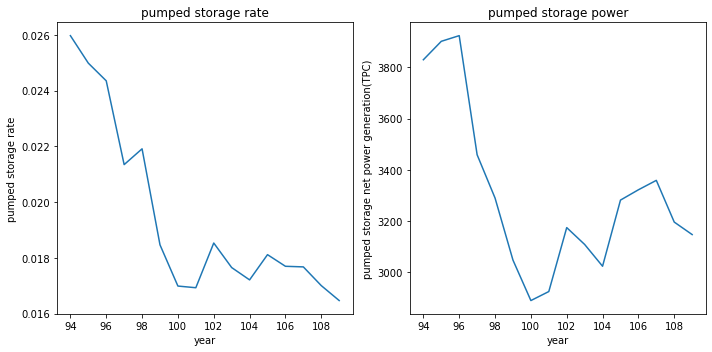

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='pumped storage rate', data=tpc_df)
ax0.set_title('pumped storage rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='pumped storage net power generation(TPC)', data=tpc_df)
ax1.set_title('pumped storage power')

fig.tight_layout()

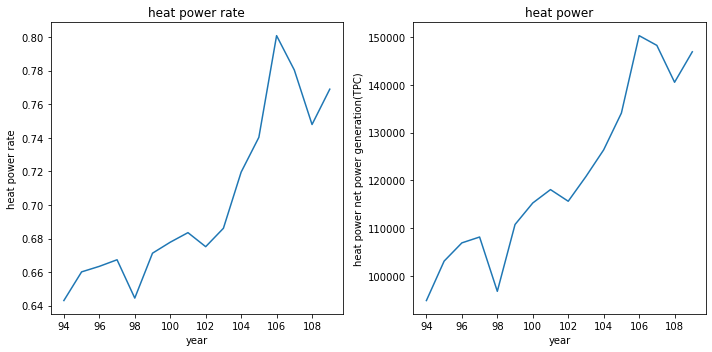

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='heat power rate', data=tpc_df)
ax0.set_title('heat power rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='heat power net power generation(TPC)', data=tpc_df)
ax1.set_title('heat power')

fig.tight_layout()

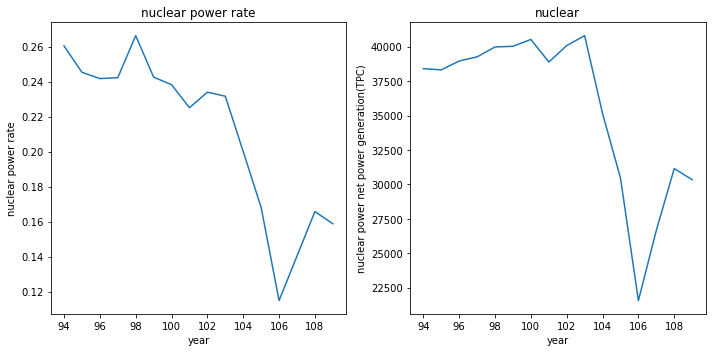

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='nuclear power rate', data=tpc_df)
ax0.set_title('nuclear power rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='nuclear power net power generation(TPC)', data=tpc_df)
ax1.set_title('nuclear')

fig.tight_layout()

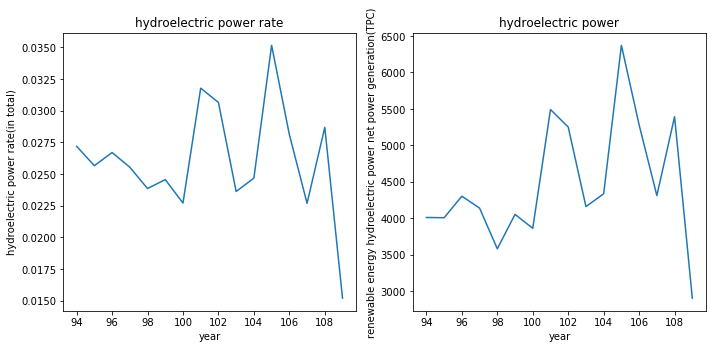

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='hydroelectric power rate(in total)', data=tpc_df)
ax0.set_title('hydroelectric power rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='renewable energy hydroelectric power net power generation(TPC)', data=tpc_df)
ax1.set_title('hydroelectric power')

fig.tight_layout()

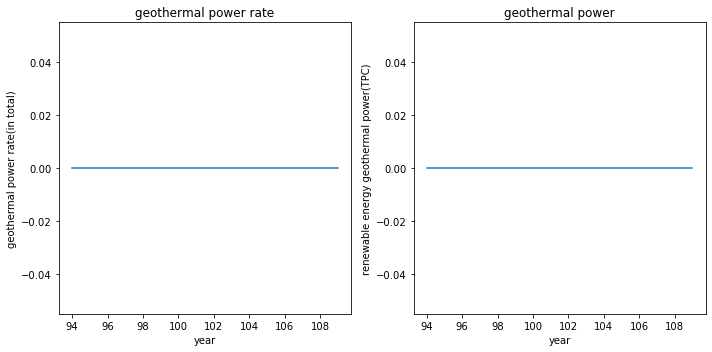

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='geothermal power rate(in total)', data=tpc_df)
ax0.set_title('geothermal power rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='renewable energy geothermal power(TPC)', data=tpc_df)
ax1.set_title('geothermal power')

fig.tight_layout()

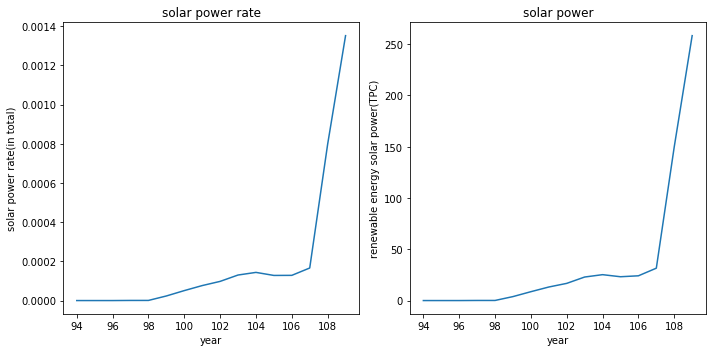

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='solar power rate(in total)', data=tpc_df)
ax0.set_title('solar power rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='renewable energy solar power(TPC)', data=tpc_df)
ax1.set_title('solar power')

fig.tight_layout()

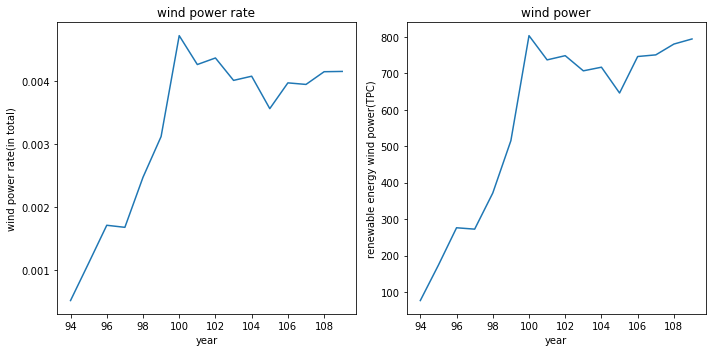

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='wind power rate(in total)', data=tpc_df)
ax0.set_title('wind power rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='renewable energy wind power(TPC)', data=tpc_df)
ax1.set_title('wind power')

fig.tight_layout()

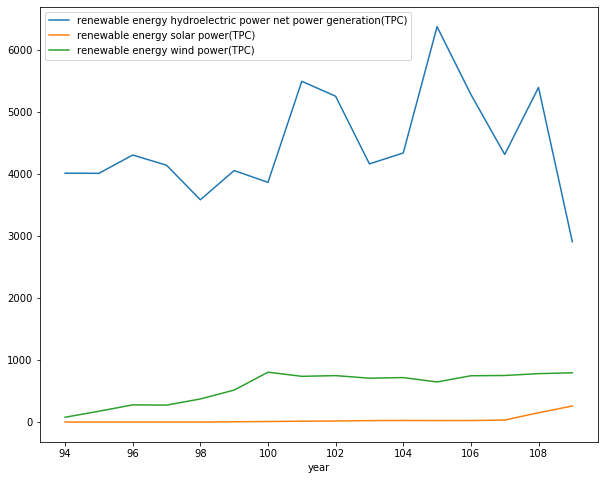

In [47]:
tpc_renewable_df = tpc_df[['year', 'renewable energy hydroelectric power net power generation(TPC)', 'renewable energy solar power(TPC)', 'renewable energy wind power(TPC)']]

tpc_renewable_df.plot(x='year', figsize=(10,8))

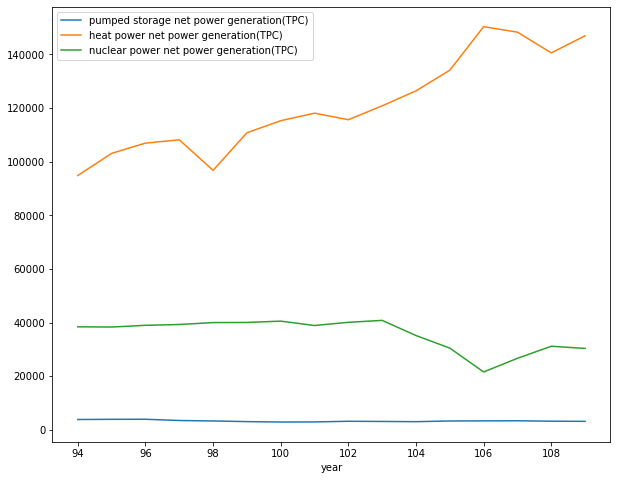

In [48]:
tpc_non_renewable_df = tpc_df[['year', 'pumped storage net power generation(TPC)', 'heat power net power generation(TPC)', 'nuclear power net power generation(TPC)']]

tpc_non_renewable_df.plot(x='year', figsize=(10,8))

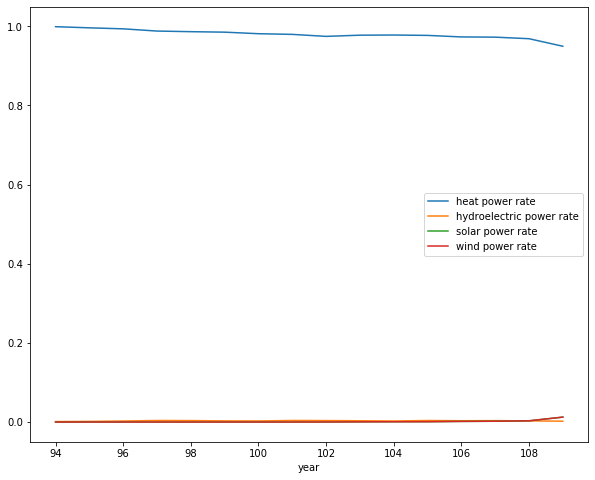

In [49]:
ipp_df = new_df[[
    'year',
    'heat power net power generation(IPP)',
    'renewable energy hydroelectric power(IPP)',
    'renewable energy solar power(IPP)', 
    'renewable energy wind power(IPP)',
    'total power generation(IPP)'
]].copy()

ipp_df['heat power rate'] = ipp_df.apply(lambda row: row['heat power net power generation(IPP)'] / row['total power generation(IPP)'], axis=1)
ipp_df['hydroelectric power rate'] = ipp_df.apply(lambda row: row['renewable energy hydroelectric power(IPP)'] / row['total power generation(IPP)'], axis=1)
ipp_df['solar power rate'] = ipp_df.apply(lambda row: row['renewable energy solar power(IPP)'] / row['total power generation(IPP)'], axis=1)
ipp_df['wind power rate'] = ipp_df.apply(lambda row: row['renewable energy solar power(IPP)'] / row['total power generation(IPP)'], axis=1)

ipp_df[[
   'year', 'heat power rate', 'hydroelectric power rate', 'solar power rate', 'wind power rate'
]].plot(x='year', figsize=(10,8))

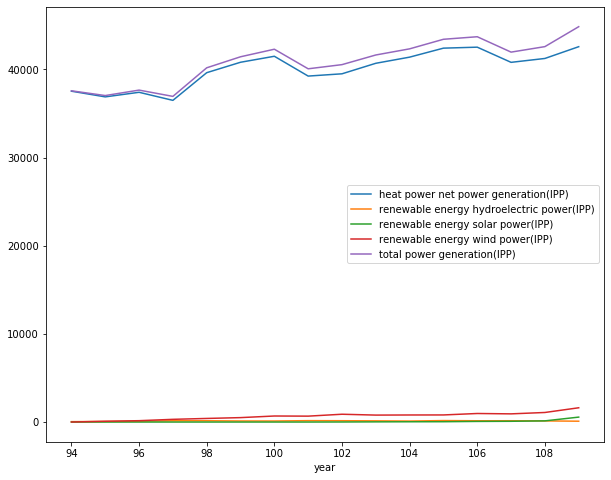

In [51]:
ipp_df[[
   'year', 'heat power net power generation(IPP)', 'renewable energy hydroelectric power(IPP)', 'renewable energy solar power(IPP)', 'renewable energy wind power(IPP)', 'total power generation(IPP)'
]].plot(x='year', figsize=(10,8))

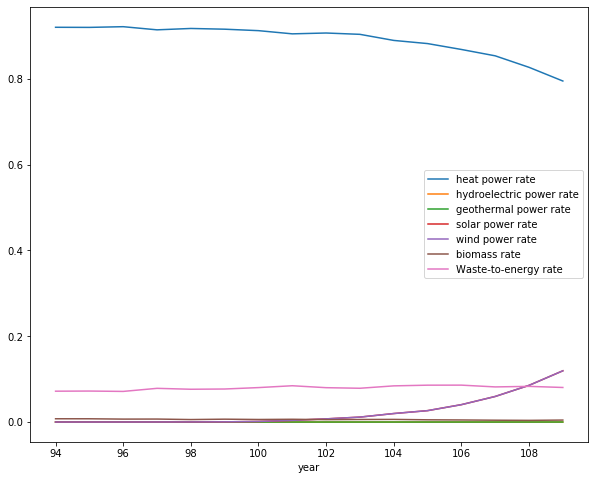

In [52]:
self_df = new_df[[
    'year', 
    'heat power net power generation(self)',
    'renewable energy hydroelectric power(self)',
    'renewable energy geothermal power(self)',
    'renewable energy solar power(self)',
    'renewable energy wind power(self)',
    'renewable energy biomass(self)',
    'renewable energy Waste-to-energy(self)', 
    'total power generation(self)'
]].copy()


self_df['heat power rate'] = self_df.apply(lambda row: row['heat power net power generation(self)'] / row['total power generation(self)'], axis=1)
self_df['hydroelectric power rate'] = self_df.apply(lambda row: row['renewable energy hydroelectric power(self)'] / row['total power generation(self)'], axis=1)
self_df['geothermal power rate'] = self_df.apply(lambda row: row['renewable energy geothermal power(self)'] / row['total power generation(self)'], axis=1)
self_df['solar power rate'] = self_df.apply(lambda row: row['renewable energy solar power(self)'] / row['total power generation(self)'], axis=1)
self_df['wind power rate'] = self_df.apply(lambda row: row['renewable energy solar power(self)'] / row['total power generation(self)'], axis=1)
self_df['biomass rate'] = self_df.apply(lambda row: row['renewable energy biomass(self)'] / row['total power generation(self)'], axis=1)
self_df['Waste-to-energy rate'] = self_df.apply(lambda row: row['renewable energy Waste-to-energy(self)'] / row['total power generation(self)'], axis=1)

self_df[[
    'year', 'heat power rate', 'hydroelectric power rate', 'geothermal power rate', 'solar power rate', 'wind power rate', 'biomass rate', 'Waste-to-energy rate'
]].plot(x='year', figsize=(10,8))


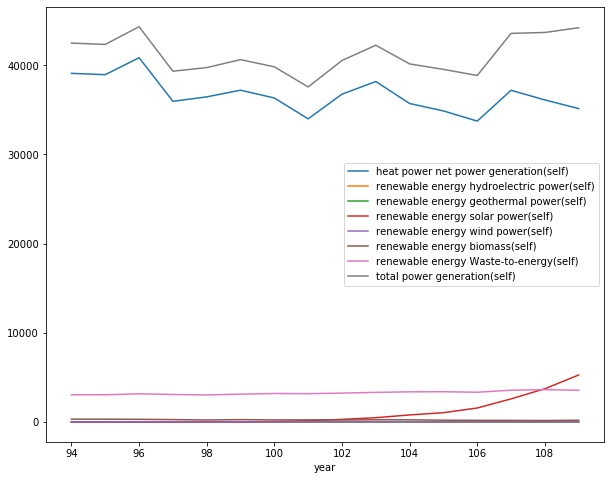

In [53]:
self_df[[
    'year', 
    'heat power net power generation(self)',
    'renewable energy hydroelectric power(self)',
    'renewable energy geothermal power(self)',
    'renewable energy solar power(self)',
    'renewable energy wind power(self)',
    'renewable energy biomass(self)',
    'renewable energy Waste-to-energy(self)', 
    'total power generation(self)'
]].plot(x='year', figsize=(10,8))

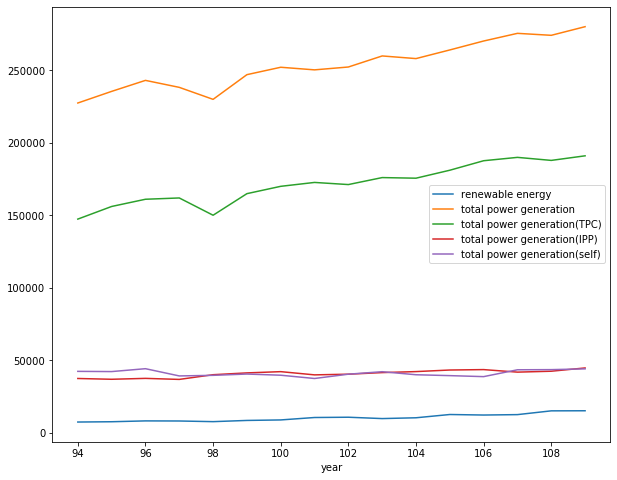

In [57]:
compare_df = new_df[[
    'year', 
    'renewable energy',
    'total power generation',
    'total power generation(TPC)',
    'total power generation(IPP)',
    'total power generation(self)'
]]
compare_df.plot(x='year', figsize=(10,8))

d:\anaconda\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


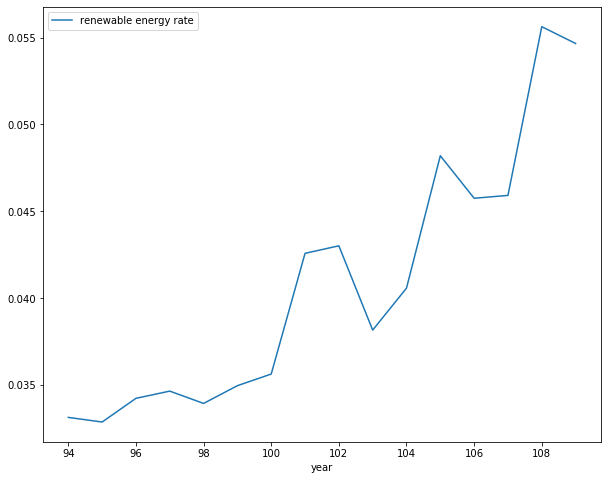

In [58]:
compare_df['renewable energy rate'] = compare_df.apply(lambda row: row['renewable energy'] / row['total power generation'], axis=1)

compare_df[[ 'year', 'renewable energy rate']].plot(x='year', figsize=(10,8))